# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
housing_df= pd.read_csv('data/kc_house_data.csv')
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


# Finding and Removing Null Values

In [3]:
housing_df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [4]:
housing_df.dropna(inplace = True)

In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [6]:
housing_df['condition'].value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [7]:
housing_df['grade'].value_counts()

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

# Creating a new column with zipcodes

In [8]:
housing_df['address'].value_counts()

Avenue, 108 Foothill Blvd, Rancho Cucamonga, California 91730, United States    38
Delridge Way Southwest, Seattle, Washington 98106, United States                24
9th Ave, Nebraska City, Nebraska 68410, United States                           21
South 35th Avenue, Bellevue, Nebraska 68123, United States                      20
A, Leadwood, Missouri 63653, United States                                      17
                                                                                ..
424B NE Maple Leaf Pl, Seattle, Washington 98115, United States                  1
19517 Southeast 261st Street, Covington, Washington 98042, United States         1
4718 West Ruffner Street, Seattle, Washington 98199, United States               1
3601 South 263rd Street, Kent, Washington 98032, United States                   1
9738 Sand Point Way Northeast, Seattle, Washington 98115, United States          1
Name: address, Length: 29519, dtype: int64

In [9]:
housing_df['zipcode'] = housing_df['address'].str.findall(r'([0-9]\d+)').apply(
    lambda x: x[-1] if len(x) >= 1 else '')
housing_df['zipcode'] = housing_df['zipcode'].astype(int)

In [10]:
housing_df = housing_df.drop(columns =['id', 'yr_renovated'], axis = 1 )

In [11]:
housing_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,address,lat,long,zipcode
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,PUBLIC,1600,1130,0,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,PUBLIC,2020,0,0,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,PUBLIC,940,920,240,110,1995,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,PUBLIC,1830,740,480,100,2006,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


# Creating a new column based on condition values

In [12]:
housing_df['condition'].value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [13]:
housing_df["condition"] = housing_df["condition"].astype('category')
housing_df["condition"] = housing_df["condition"].cat.reorder_categories(
    ["Poor","Fair","Average","Good","Very Good"])

In [14]:
housing_df["condition_code"] = housing_df["condition"].cat.codes
housing_df["condition_code"].value_counts()

2    18515
3     8052
4     3258
1      225
0       61
Name: condition_code, dtype: int64

# Splitting string and numerical value form the grades column. Creating a new column with grades numerical value

In [15]:
housing_df["grade"].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [16]:
import string
housing_df["grade_str"] = housing_df["grade"].str.strip(string.digits)
housing_df["grade_str"] = housing_df["grade_str"].str.strip()

In [17]:
housing_df["grade_code"] = housing_df["grade_str"].astype('category')
categories = ['Substandard','Poor','Low','Fair','Low Average','Average','Good','Better',
             'Very Good','Excellent','Luxury','Mansion']
housing_df["grade_code"] = housing_df["grade_code"].cat.reorder_categories(categories)
housing_df["grade_code"] = housing_df["grade_code"].cat.codes
housing_df["grade_code"].value_counts()

5     11693
6      9400
7      3804
4      2852
8      1369
9       406
3       385
10      122
2        46
11       24
1         9
0         1
Name: grade_code, dtype: int64

# Repeating steps above w/ view column

In [18]:
housing_df["view_code"] = housing_df["view"].astype('category')
categories2 = ["NONE","FAIR","AVERAGE","GOOD","EXCELLENT"]
housing_df["view_code"] = housing_df["view_code"].cat.reorder_categories(categories2)
housing_df["view_code"] = housing_df["view_code"].cat.codes
housing_df["view_code"].value_counts()

0    26555
2     1910
3      877
4      549
1      220
Name: view_code, dtype: int64

## Removing zip codes not in Kings County

In [19]:
zip_dict = dict({
98002 : "Auburn",
98092: "Auburn",
98224: "Baring",
98004: "Bellevue",
98005: "Bellevue",
98006: "Bellevue",
98007: "Bellevue",
98008: "Bellevue",
98010: "Black Diamond",
98011: "Bothell",
98178: "Bryn Mawr-Skyway",
98148: "Burien",
98166: "Burien",
98014: "Carnation",
98077: "Cottage Lake",
98042: "Covington",
98198: "Des Moines",
98019: "Duvall",
98031: "East Hill-Meridian",
98022: "Enumclaw",
98058: "Fairwood",
98024: "Fall City",
98003: "Federal Way",
98023: "Federal Way",
98027: "Issaquah",
98029: "Issaquah",
98028: "Kenmore",
98032: "Kent",
98030: "Kent",
98033: "Kirkland",
98034: "Kirkland",
98001: "Lakeland North",
98038: "Maple Valley",
98039: "Medina",
98040: "Mercer Island",
98045: "North Bend",
98047: "Pacific",
98050: "Preston",
98051: "Ravensdale",
98052: "Redmond",
98055: "Renton",
98056: "Renton",
98057: "Renton",
98059: "Renton",
98074: "Sammamish",
98075: "Sammamish",
98188: "SeaTac",
98199: "Seattle",
98174: "Seattle",
98154: "Seattle",
98158: "Seattle",
98164: "Seattle",
98101: "Seattle",
98102: "Seattle",
98103: "Seattle",
98104: "Seattle",
98105: "Seattle",
98106: "Seattle",
98107: "Seattle",
98108: "Seattle",
98109: "Seattle",
98112: "Seattle",
98115: "Seattle",
98116: "Seattle",
98117: "Seattle",
98118: "Seattle",
98119: "Seattle",
98121: "Seattle",
98122: "Seattle",
98125: "Seattle",
98126: "Seattle",
98133: "Seattle",
98134: "Seattle",
98136: "Seattle",
98144: "Seattle",
98155: "Shoreline",
98177: "Shoreline",
98288: "Skykomish",
98065: "Snoqualmie",
98168: "Tukwila",
98053: "Union Hill-Novelty Hill",
98195: "Univ Of Washington",
98070: "Vashon",
98146: "White Center",
98072: "Woodinville"})

In [20]:
zip_list = list(zip_dict.keys())

In [21]:
housing_df2 = housing_df[housing_df["zipcode"].isin(zip_list)]
housing_df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_patio,yr_built,address,lat,long,zipcode,condition_code,grade_str,grade_code,view_code
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,3,Average,5,0
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,2,Average,5,2
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,0,1956,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,2,Average,5,2
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,2,Better,7,2
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,2,Average,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103,3,Good,6,0
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116,2,Average,5,1
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,110,1995,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122,2,Average,5,0
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,100,2006,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055,2,Good,6,0


In [22]:
housing_df2 = housing_df2.drop(columns = ["condition","grade","grade_str","view","sqft_basement"], axis=1)

## create price/sqft column and house_age column


In [23]:
housing_df2["price_per_sqft"] = housing_df2["price"]/ housing_df2["sqft_living"]

In [24]:
housing_df['house_age'] = pd.to_datetime(housing_df['date']).dt.year - housing_df['yr_built']
housing_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,yr_built,address,lat,long,zipcode,condition_code,grade_str,grade_code,view_code,house_age
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,1969,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,3,Average,5,0,53
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1950,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,2,Average,5,2,71
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1956,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,2,Average,5,2,65
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,2010,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,2,Better,7,2,11
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,2,Average,5,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,1921,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103,3,Good,6,0,100
30151,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116,2,Average,5,1,10
30152,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,1995,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122,2,Average,5,0,27
30153,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,2006,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055,2,Good,6,0,16


In [25]:
numerical = ["price", "sqft_living", "sqft_above", "price_per_sqft" ]
ordinal = [ "bedrooms", "bathrooms", "floors","waterfront", "greenbelt", "condition_code", "grade_code"]

## Visualize te numerical and ordinal values

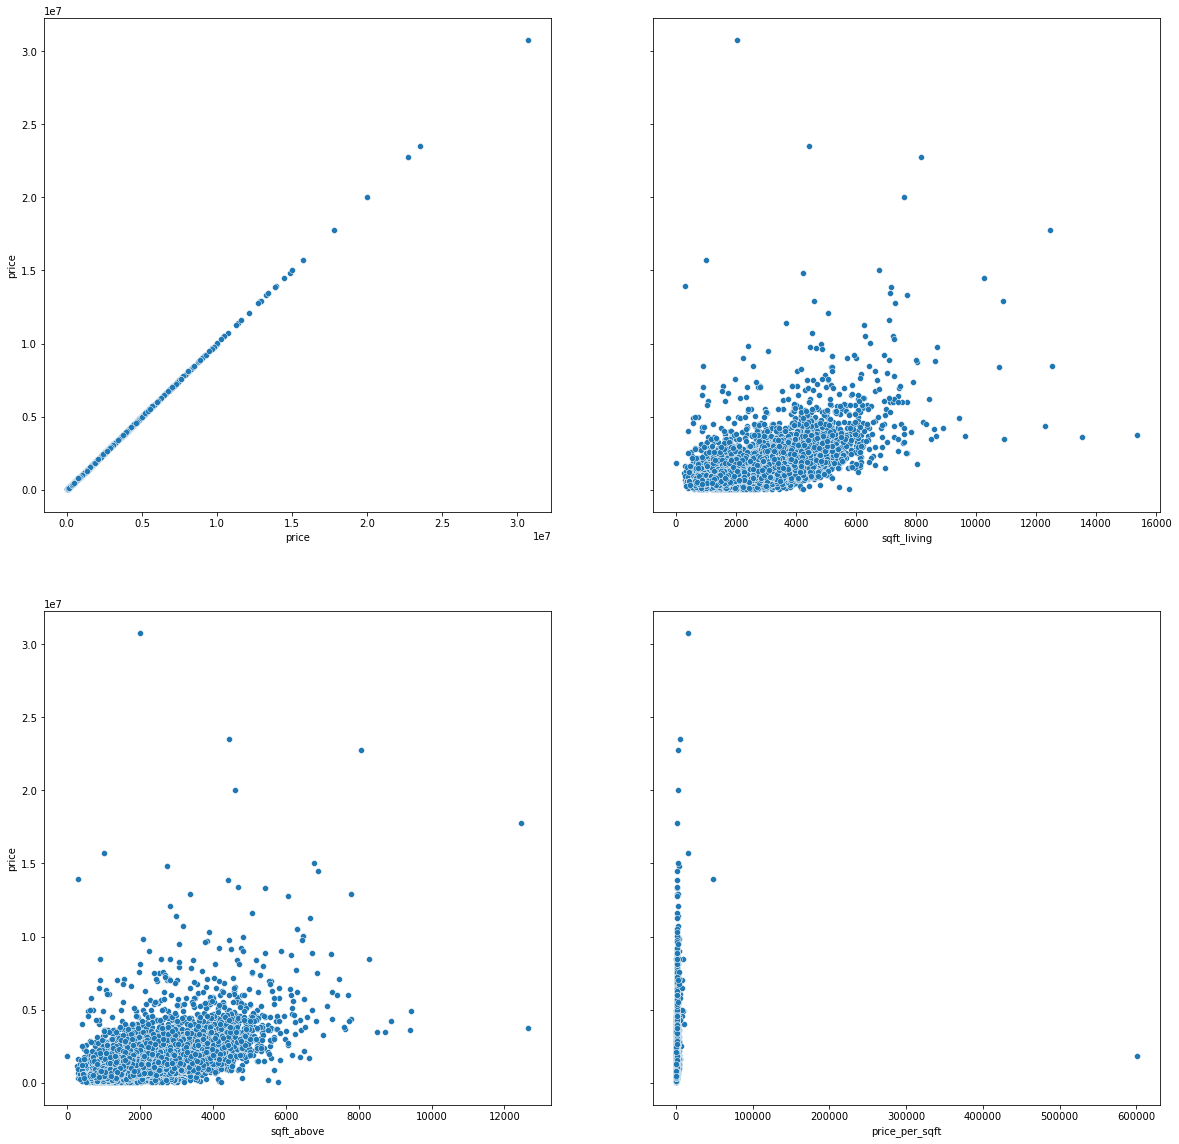

In [26]:
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(20,20))
axes = np.ravel(axes)
for i in range(len(numerical)):
    sns.scatterplot(data=housing_df2, x=numerical[i], y= "price", ax=axes[i])

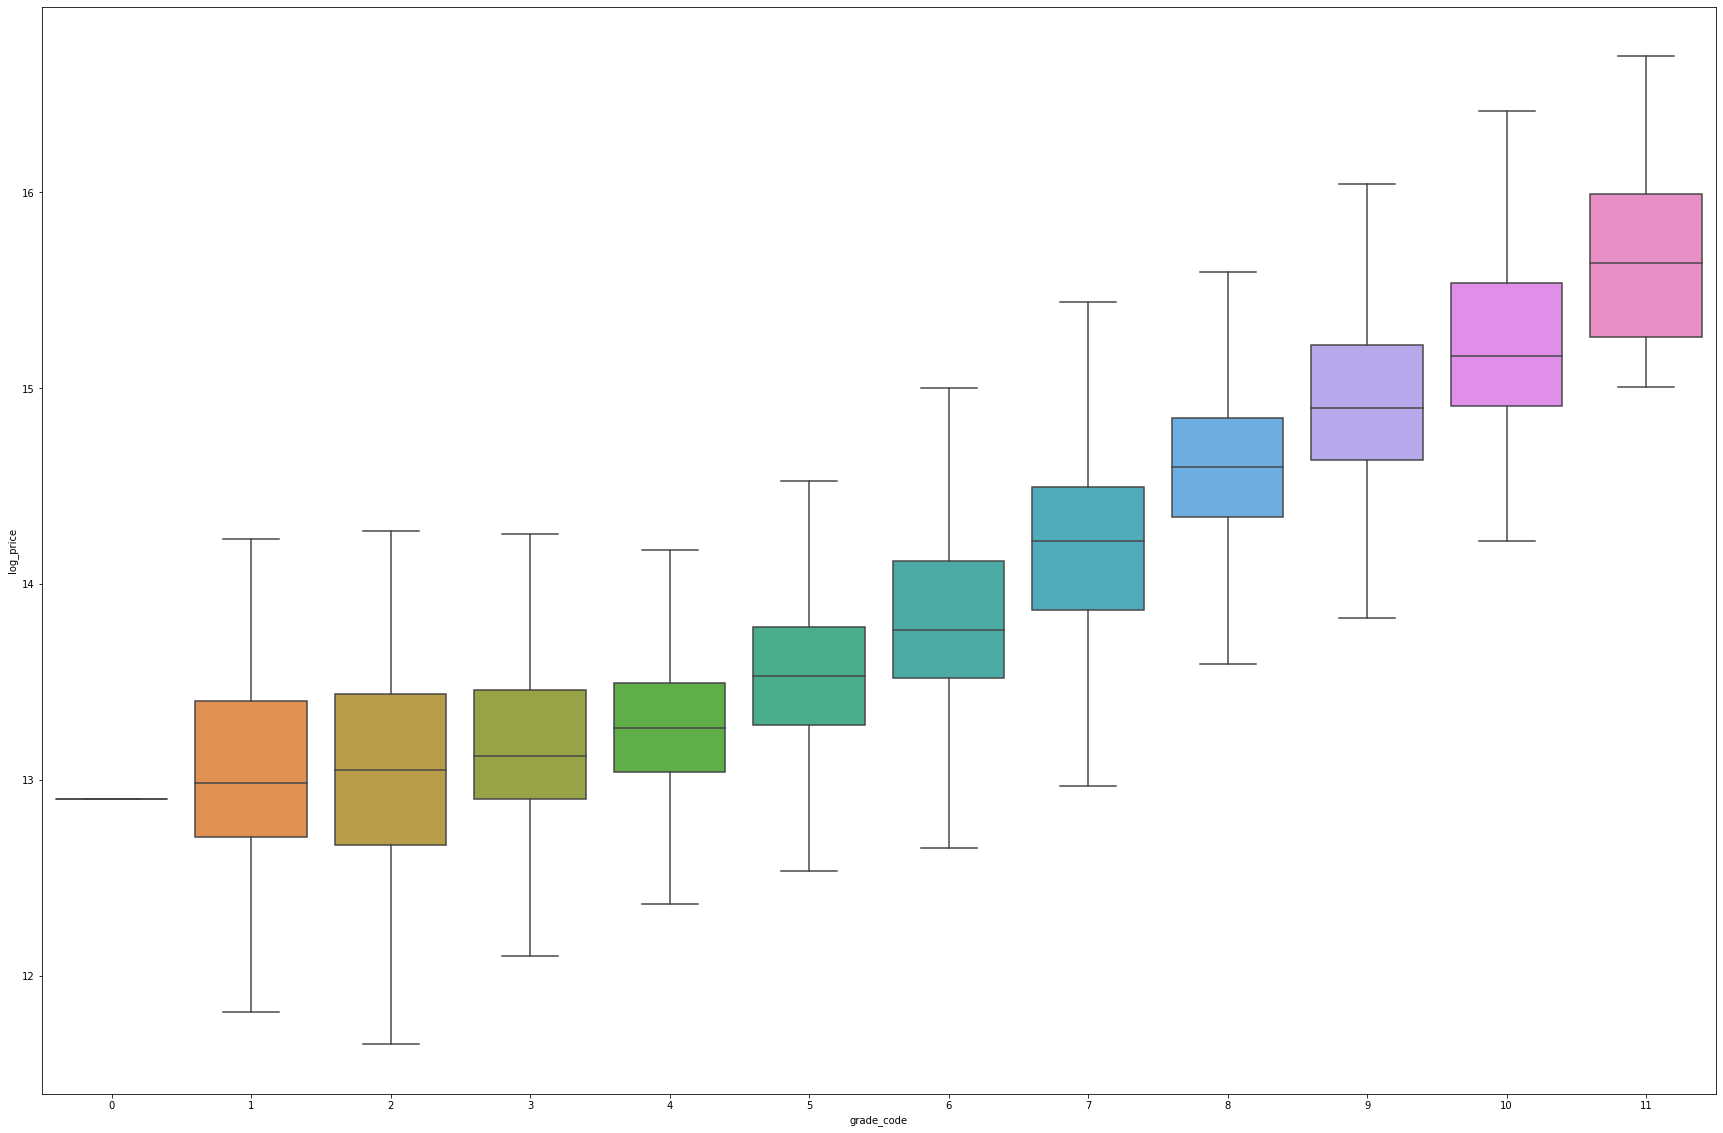

In [27]:
housing_df2['log_price'] = np.log(housing_df2['price'])
ordinal_features_to_plot = ["grade_code"]
fig, axes = plt.subplots( sharey=True, figsize=(30, 20))
axes = np.ravel(axes)
for i in range(len(ordinal_features_to_plot)):
    sns.boxplot(data=housing_df2, x=ordinal_features_to_plot[i], y="log_price", ax=axes[i], showfliers = False)

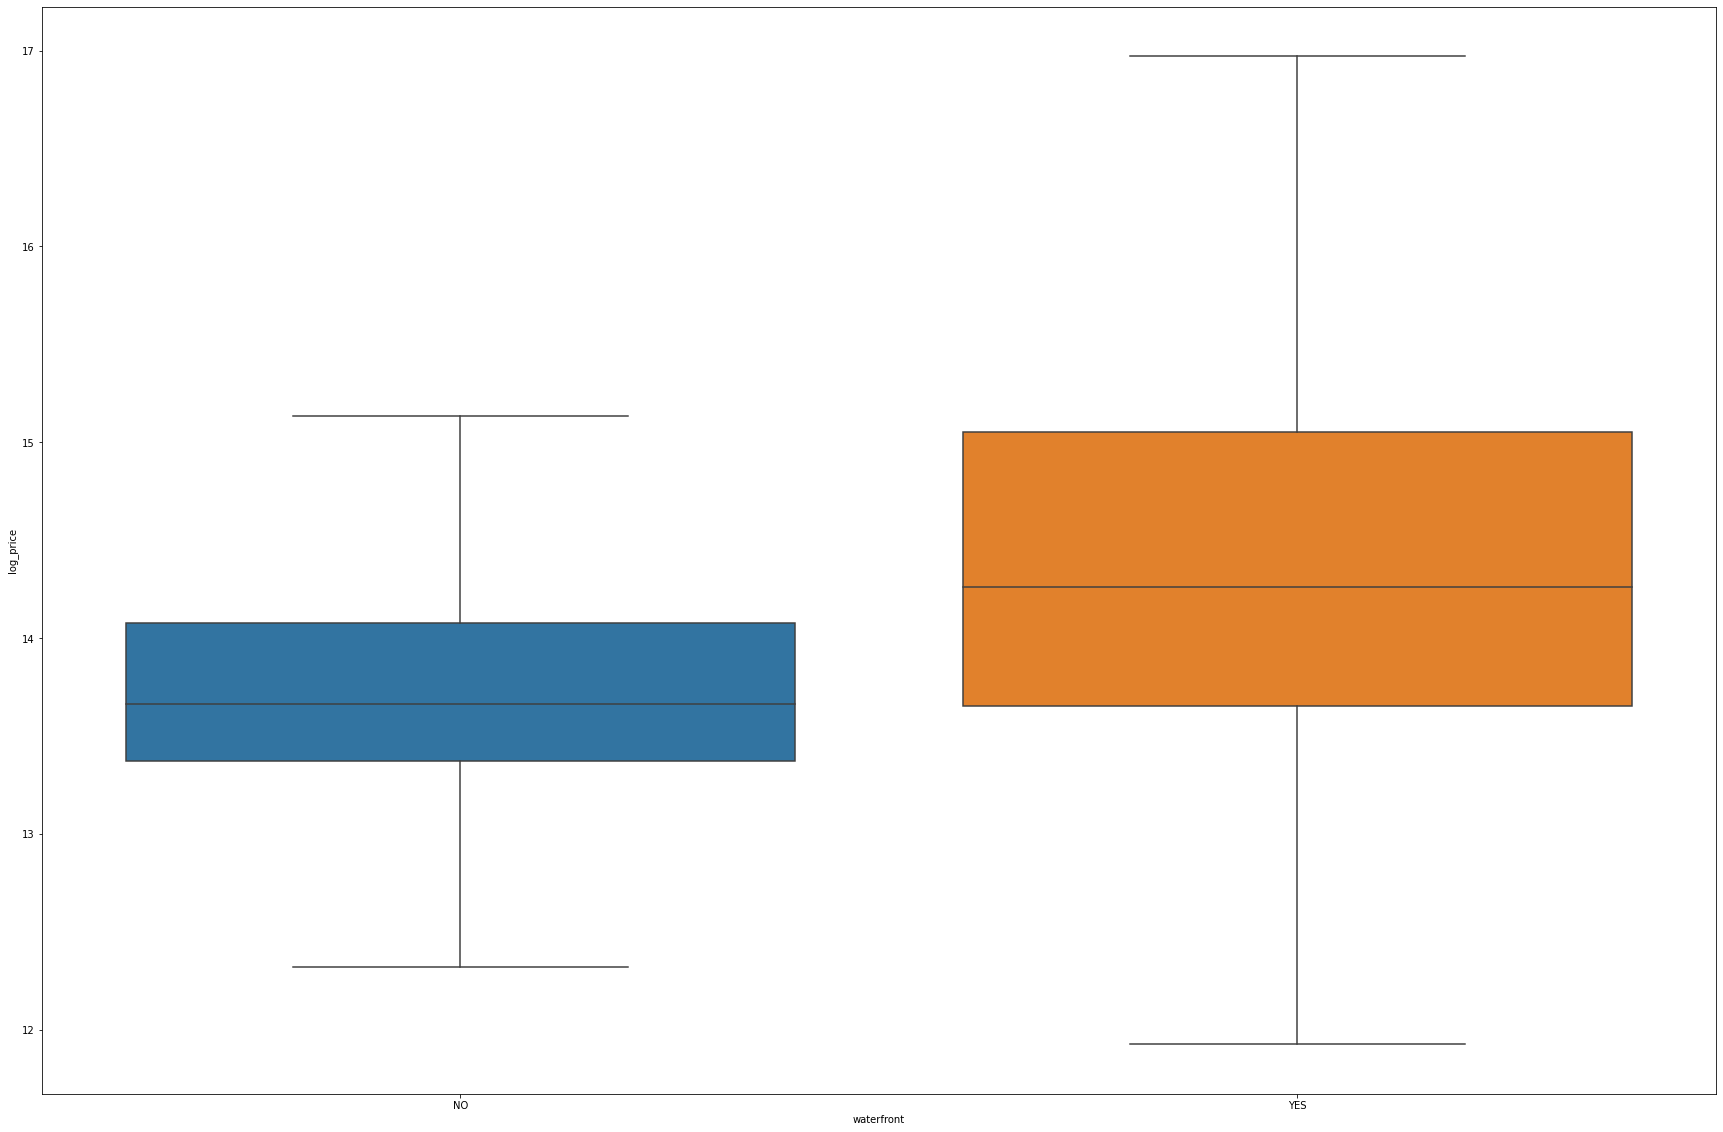

In [28]:
housing_df2['log_price'] = np.log(housing_df2['price'])
ordinal_features_to_plot = ["waterfront"]
fig, axes = plt.subplots( sharey=True, figsize=(30, 20))
axes = np.ravel(axes)
for i in range(len(ordinal_features_to_plot)):
    sns.boxplot(data=housing_df2, x=ordinal_features_to_plot[i], y="log_price", ax=axes[i], showfliers = False)

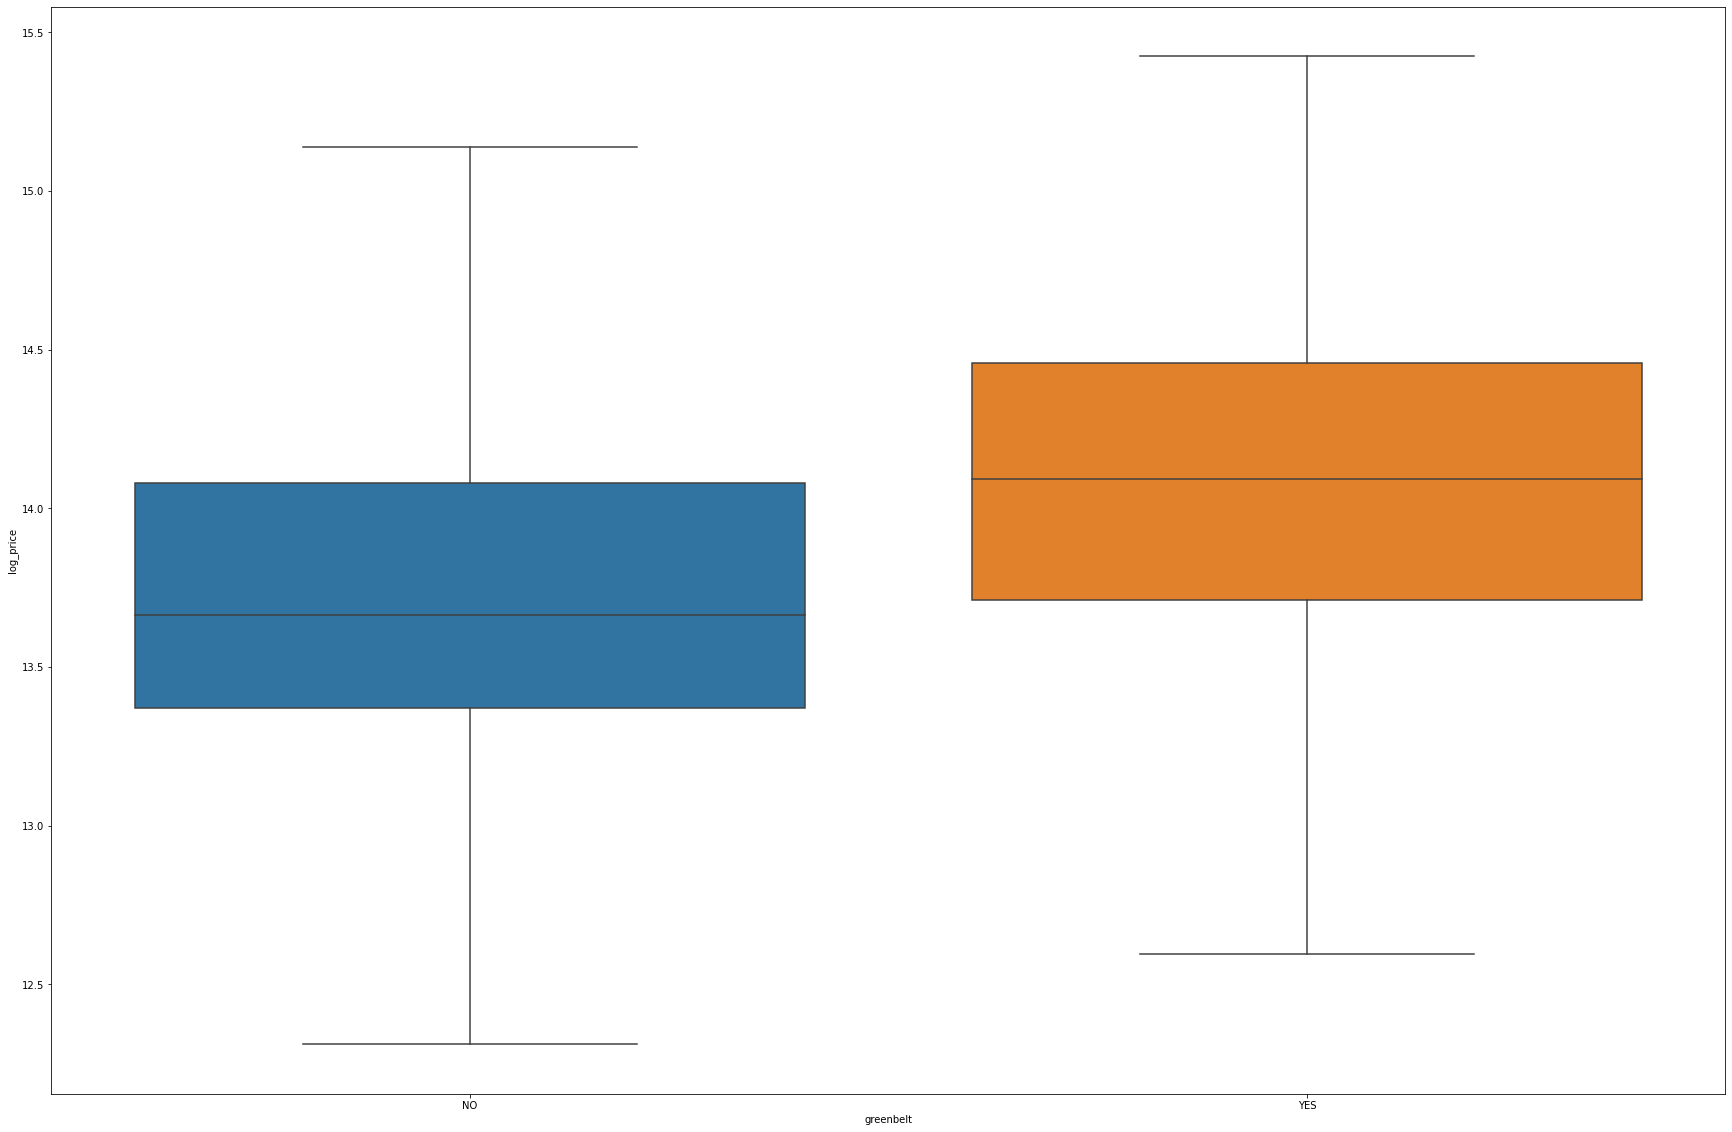

In [29]:
housing_df2['log_price'] = np.log(housing_df2['price'])
ordinal_features_to_plot = ["greenbelt"]
fig, axes = plt.subplots( sharey=True, figsize=(30, 20))
axes = np.ravel(axes)
for i in range(len(ordinal_features_to_plot)):
    sns.boxplot(data=housing_df2, x=ordinal_features_to_plot[i], y="log_price", ax=axes[i], showfliers = False)

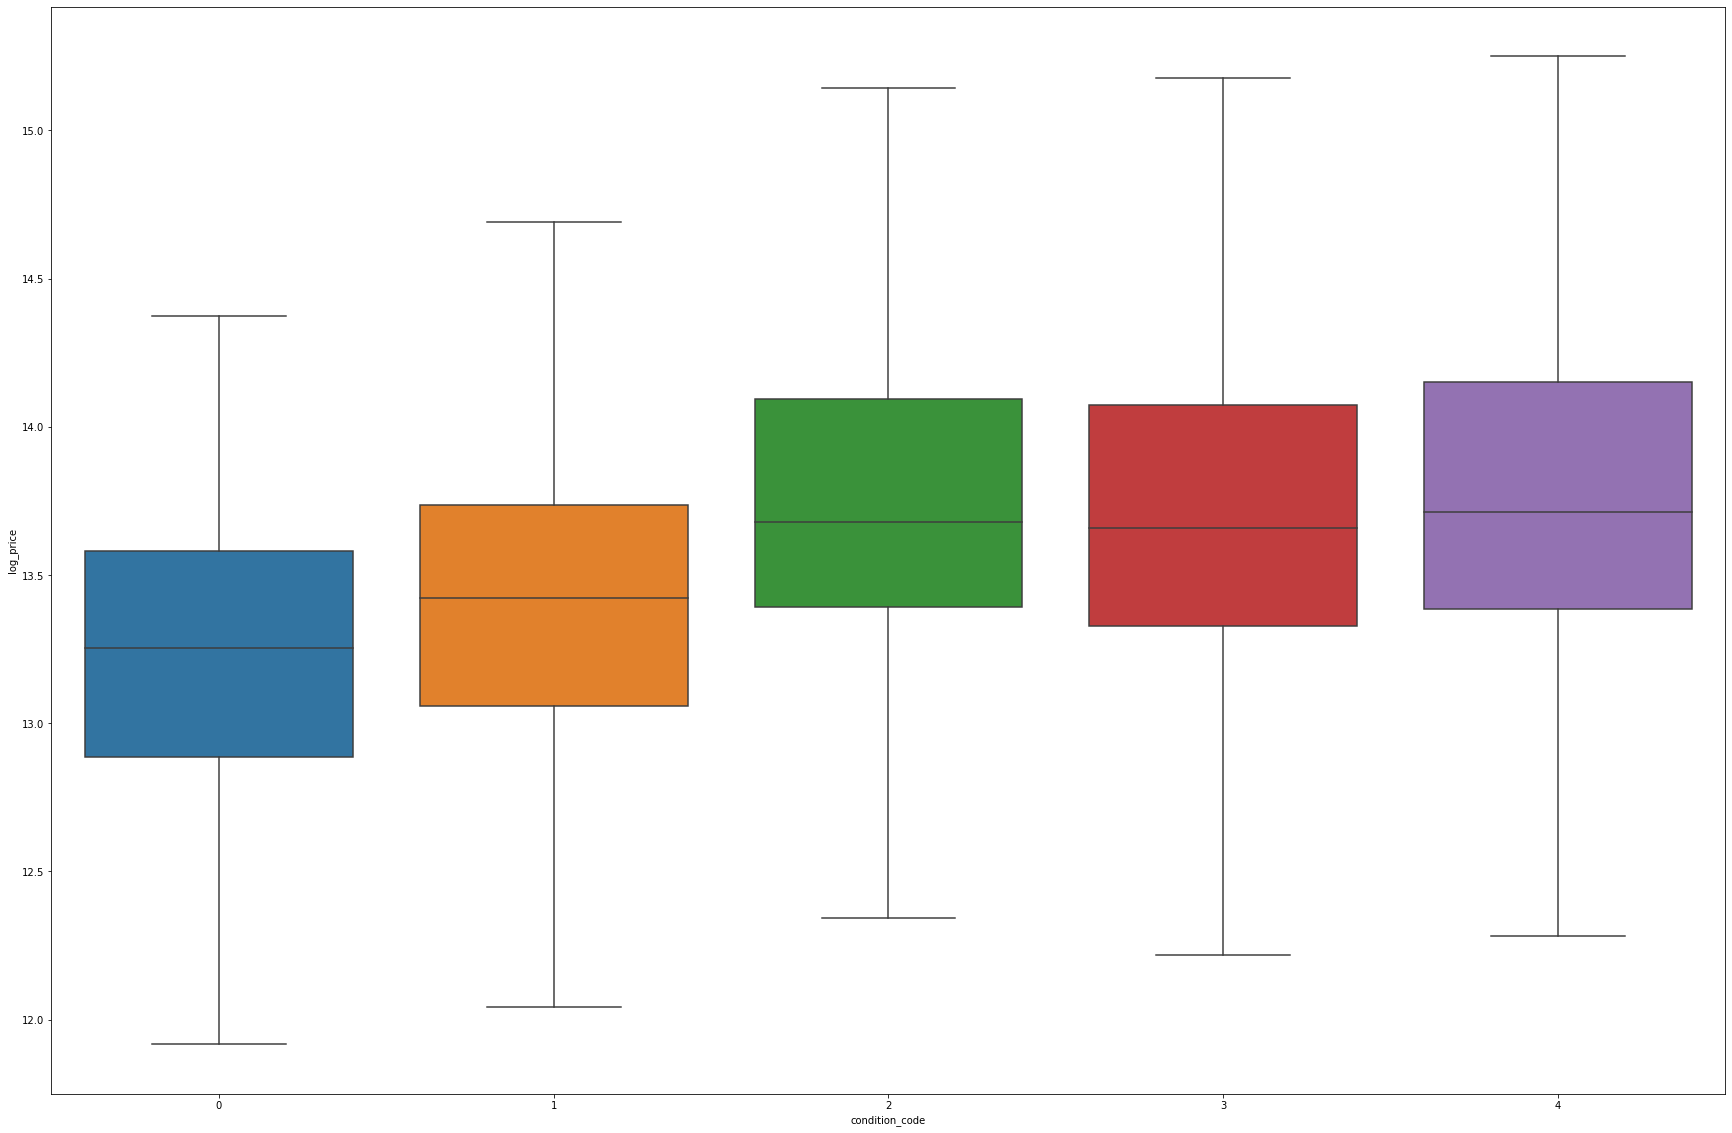

In [30]:
housing_df2['log_price'] = np.log(housing_df2['price'])
ordinal_features_to_plot = ["condition_code"]
fig, axes = plt.subplots( sharey=True, figsize=(30, 20))
axes = np.ravel(axes)
for i in range(len(ordinal_features_to_plot)):
    sns.boxplot(data=housing_df2, x=ordinal_features_to_plot[i], y="log_price", ax=axes[i], showfliers = False)

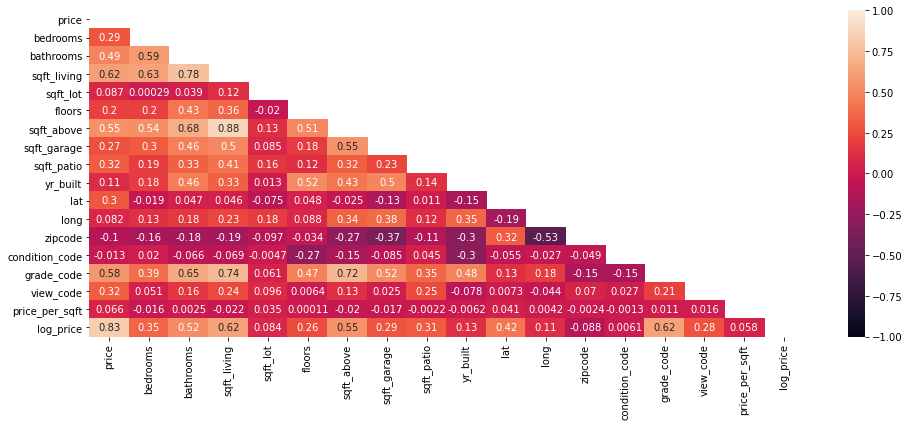

In [31]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(housing_df2.corr(), dtype=np.bool))
heatmap = sns.heatmap(housing_df2.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

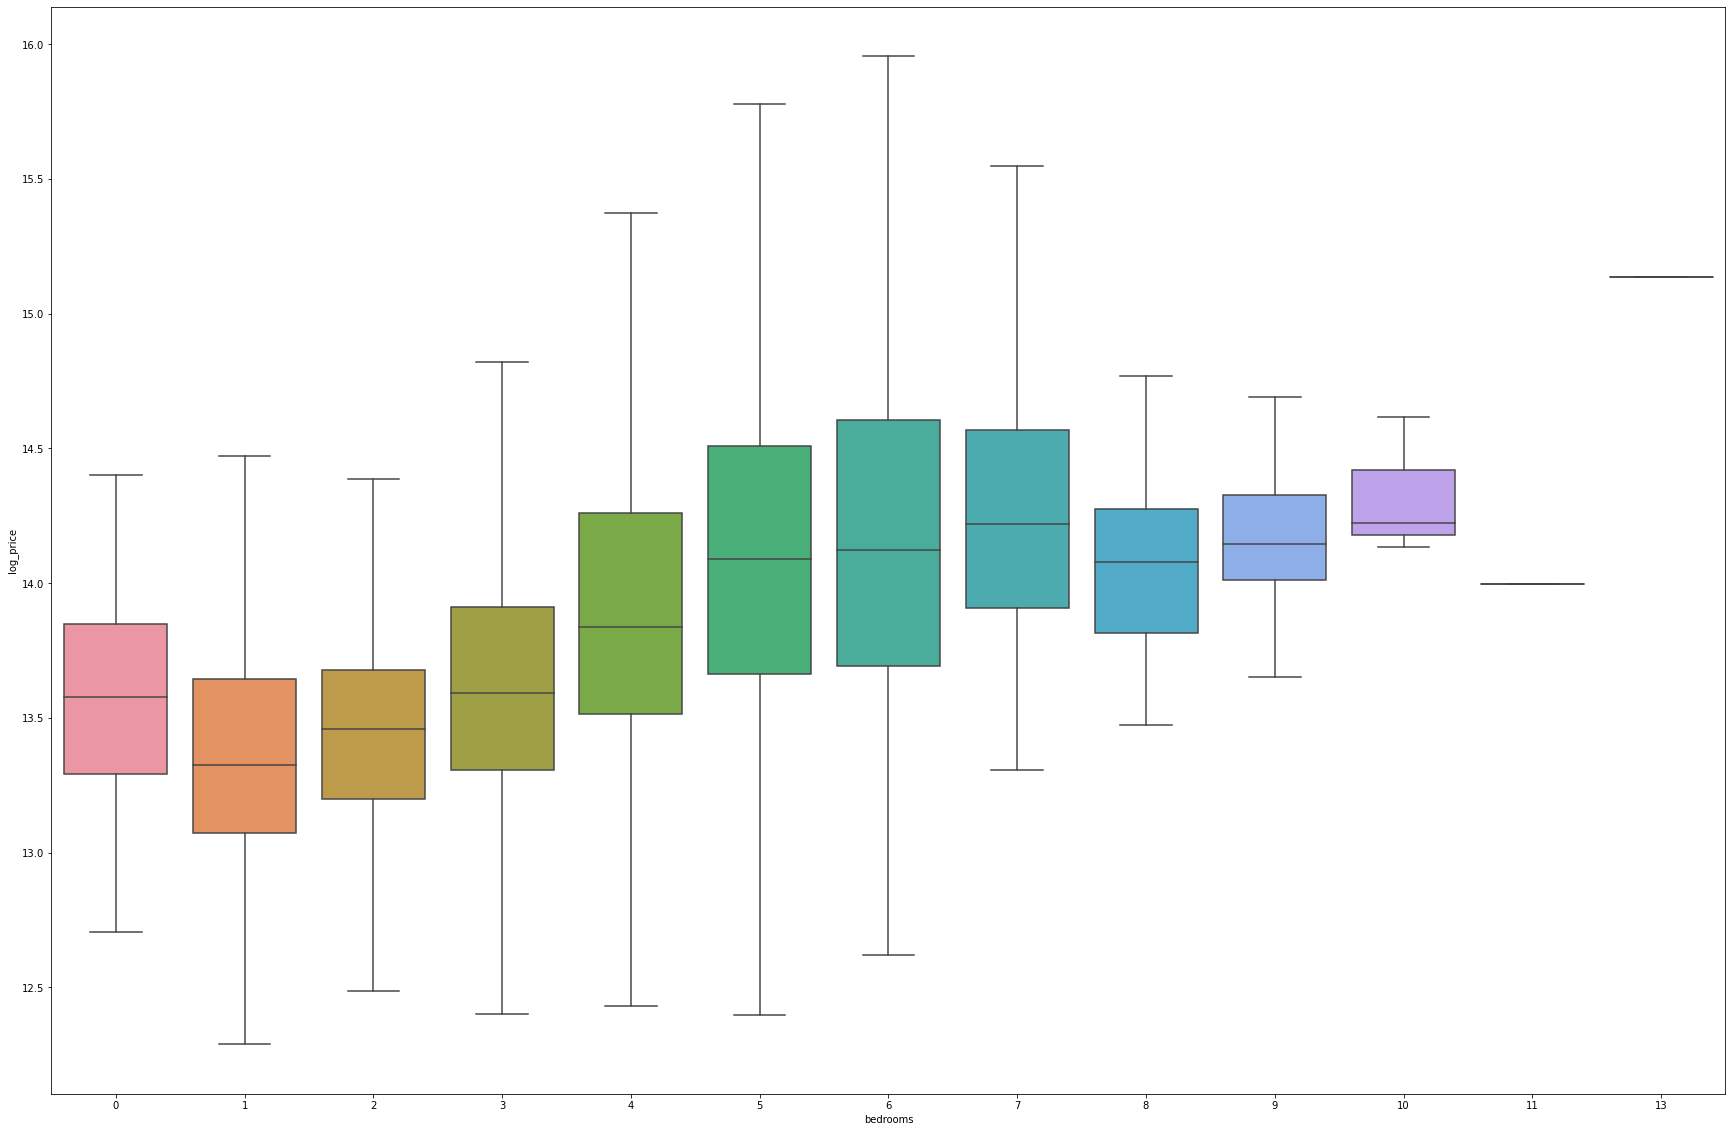

In [32]:
housing_df2['log_price'] = np.log(housing_df2['price'])
ordinal_features_to_plot = ["bedrooms"]
fig, axes = plt.subplots( sharey=True, figsize=(30, 20))
axes = np.ravel(axes)
for i in range(len(ordinal_features_to_plot)):
    sns.boxplot(data=housing_df2, x=ordinal_features_to_plot[i], y="log_price", ax=axes[i], showfliers = False)

In [116]:
grouped_zip = housing_df2.groupby(['zipcode'])['price'].mean().reset_index().sort_values('price', ascending=False)
grouped_zip

,zipcode,price
24,98039,5.319170e+06
3,98004,3.706462e+06
25,98040,2.761960e+06
4,98005,2.166382e+06
21,98033,2.035935e+06
...,...,...
68,98168,5.389555e+05
28,98047,4.929118e+05
1,98002,4.754262e+05
75,98288,4.572688e+05


In [133]:
housing_df2 = pd.get_dummies(housing_df2.zipcode, prefix='zipcode')

AttributeError: 'DataFrame' object has no attribute 'zipcode'

In [134]:
housing_df2

,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,zipcode_98224,zipcode_98288
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


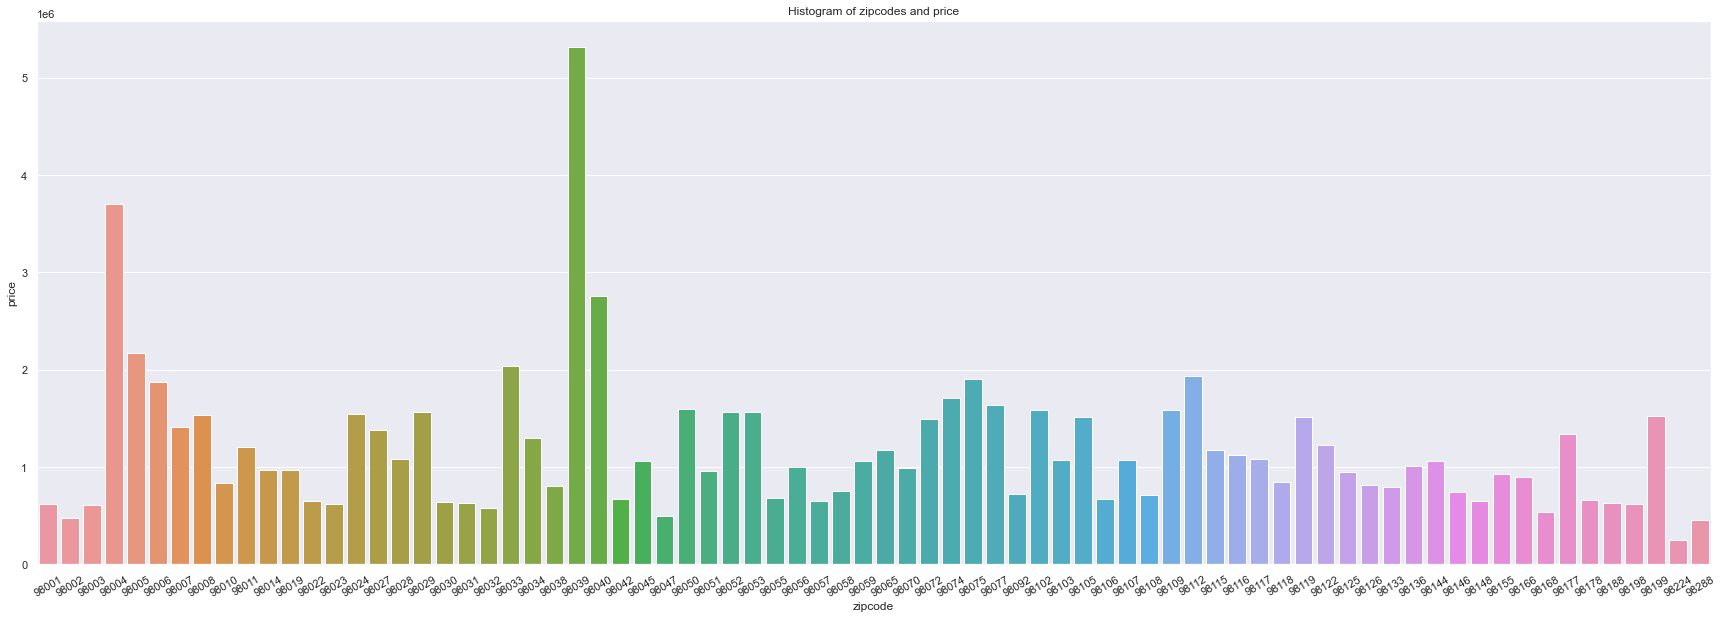

In [96]:


                 
ax = sns.barplot(data= grouped_zip, x="zipcode", y= "price")
sns.set(rc={"figure.figsize":(30, 20)})
ax.set(title="Histogram of zipcodes and price")
plt.xticks(rotation=30)
plt.show()

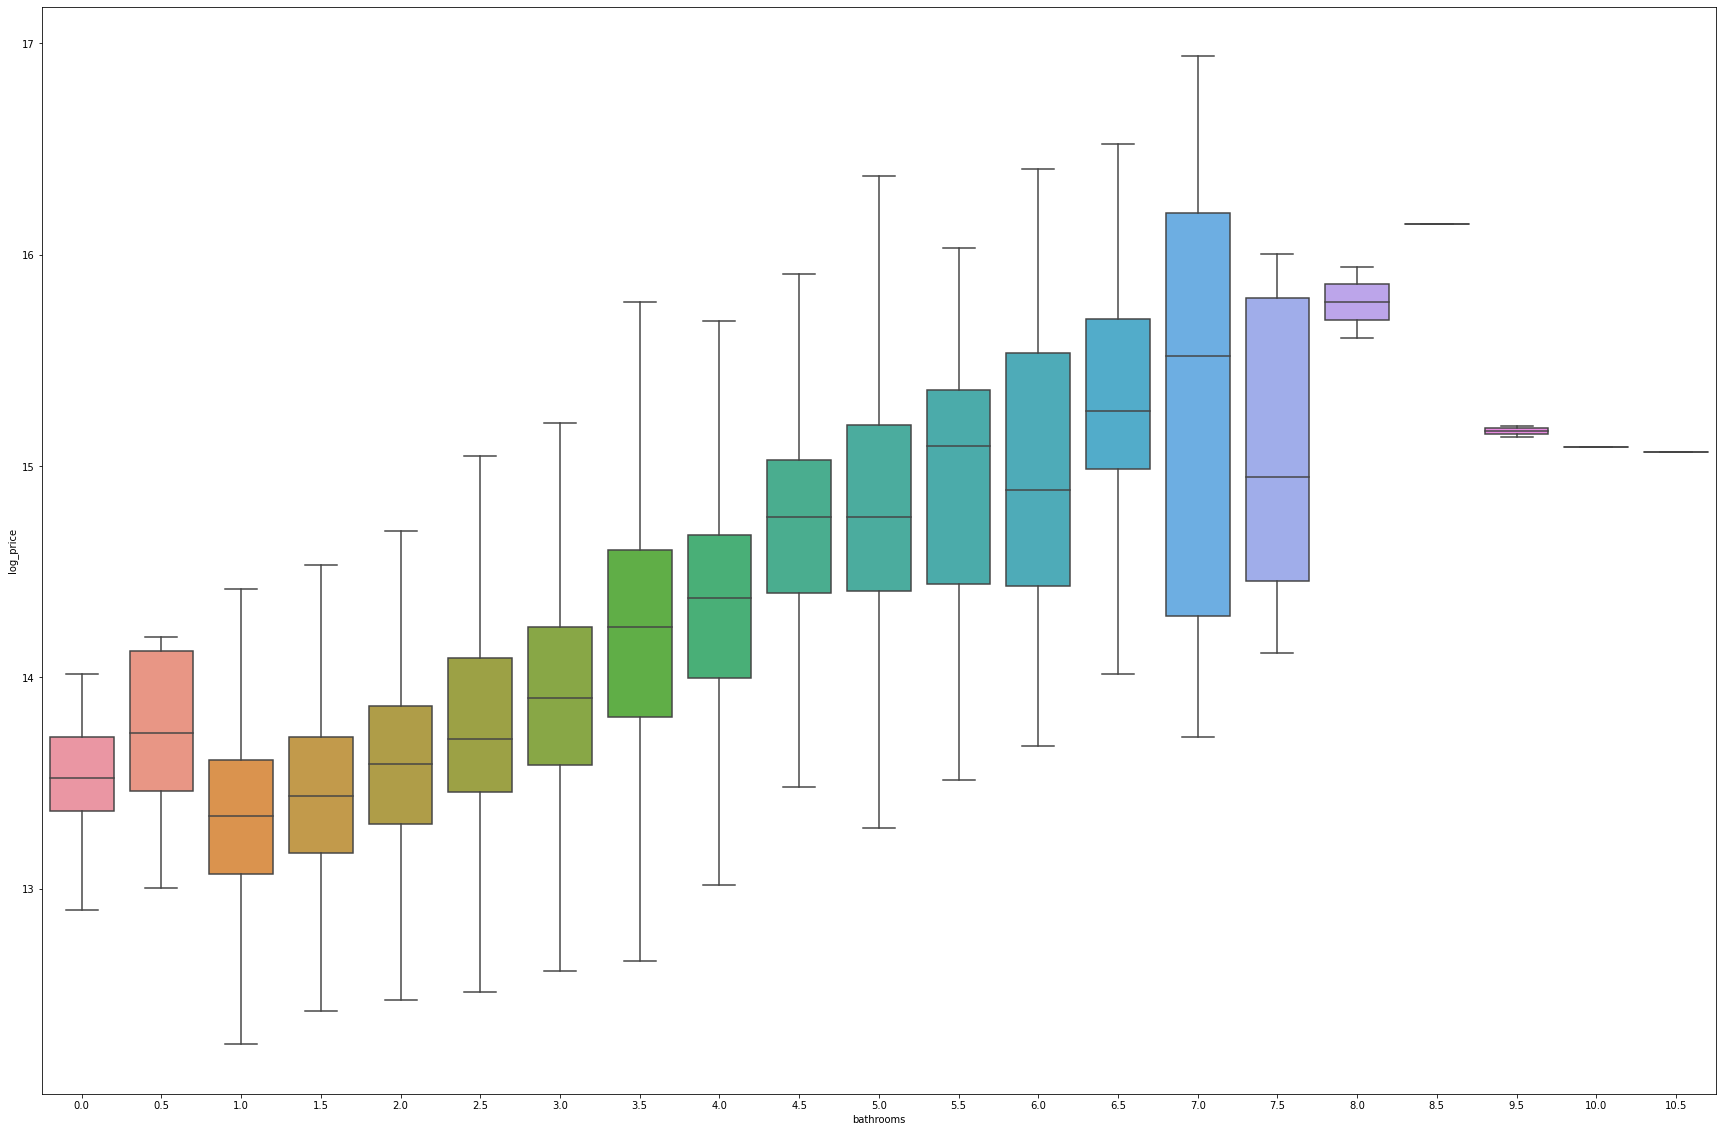

In [34]:
housing_df2['log_price'] = np.log(housing_df2['price'])
ordinal_features_to_plot = ["bathrooms"]
fig, axes = plt.subplots( sharey=True, figsize=(30, 20))
axes = np.ravel(axes)
for i in range(len(ordinal_features_to_plot)):
    sns.boxplot(data=housing_df2, x=ordinal_features_to_plot[i], y="log_price", ax=axes[i], showfliers = False)

In [35]:
housing_df2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_garage,sqft_patio,yr_built,lat,long,zipcode,condition_code,grade_code,view_code,price_per_sqft,log_price
count,2.914900e+04,29149.000000,29149.000000,29149.000000,2.914900e+04,29149.000000,29149.000000,29149.000000,29149.000000,29149.000000,29149.000000,29149.000000,29149.000000,29149.000000,29149.000000,29149.00000,29149.000000,29149.000000
mean,1.113429e+06,3.436928,2.332807,2131.761536,1.712923e+04,1.516639,1826.453292,336.493533,216.385468,1973.829394,47.543327,-122.214455,98077.230265,2.487324,5.639302,0.30152,558.303486,13.738703
std,8.958603e+05,0.976836,0.894821,976.885624,6.085121e+04,0.548334,880.328665,286.238563,246.801963,31.667405,0.145961,0.142918,54.107337,0.707848,1.152643,0.86269,3544.269296,0.585410
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,1900.000000,47.159700,-122.526650,98001.000000,0.000000,0.000000,0.00000,6.920415,10.216837
25%,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,40.000000,1952.000000,47.431010,-122.328460,98032.000000,2.000000,5.000000,0.00000,357.870647,13.377006
50%,8.690000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,400.000000,141.000000,1976.000000,47.557890,-122.234070,98059.000000,2.000000,5.000000,0.00000,487.804878,13.675098
75%,1.310000e+06,4.000000,3.000000,2640.000000,1.077200e+04,2.000000,2290.000000,520.000000,310.000000,2001.000000,47.672005,-122.127645,98117.000000,3.000000,6.000000,0.00000,642.016807,14.085538
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,3580.000000,4370.000000,2022.000000,47.789830,-121.163960,98288.000000,4.000000,11.000000,4.00000,601000.000000,17.241401


In [36]:
housing_df2['price'] = housing_df2['price'].astype(int)

In [37]:
housing_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29149 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            29149 non-null  object 
 1   price           29149 non-null  int64  
 2   bedrooms        29149 non-null  int64  
 3   bathrooms       29149 non-null  float64
 4   sqft_living     29149 non-null  int64  
 5   sqft_lot        29149 non-null  int64  
 6   floors          29149 non-null  float64
 7   waterfront      29149 non-null  object 
 8   greenbelt       29149 non-null  object 
 9   nuisance        29149 non-null  object 
 10  heat_source     29149 non-null  object 
 11  sewer_system    29149 non-null  object 
 12  sqft_above      29149 non-null  int64  
 13  sqft_garage     29149 non-null  int64  
 14  sqft_patio      29149 non-null  int64  
 15  yr_built        29149 non-null  int64  
 16  address         29149 non-null  object 
 17  lat             29149 non-null 

# Creating price per sqft column

In [38]:
housing_df["price_per_sqft"] = housing_df["price"]/housing_df["sqft_living"]

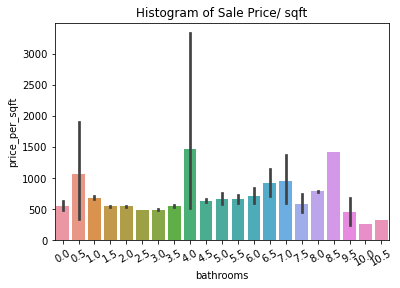

In [39]:
price_sqft = sns.barplot(data = housing_df,x = "bathrooms", y="price_per_sqft")
price_sqft.set(title="Histogram of Sale Price/ sqft")
plt.xticks(rotation=30)
plt.show()

# Simple Linear Regression - Price & Grade

In [40]:
import statsmodels.api as sm

X = housing_df[['grade_code']]
y = housing_df['price']

# Replace None with appropriate code
simple_model = sm.OLS(endog = y, exog = sm.add_constant(X))

simple_model_results = simple_model.fit()
print(simple_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                 1.423e+04
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        11:33:03   Log-Likelihood:            -4.4961e+05
No. Observations:               30111   AIC:                         8.992e+05
Df Residuals:                   30109   BIC:                         8.992e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -1.4e+06   2.15e+04    -65.245      0.0

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [102]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [103]:
y_pred = regressor.predict(X_test)

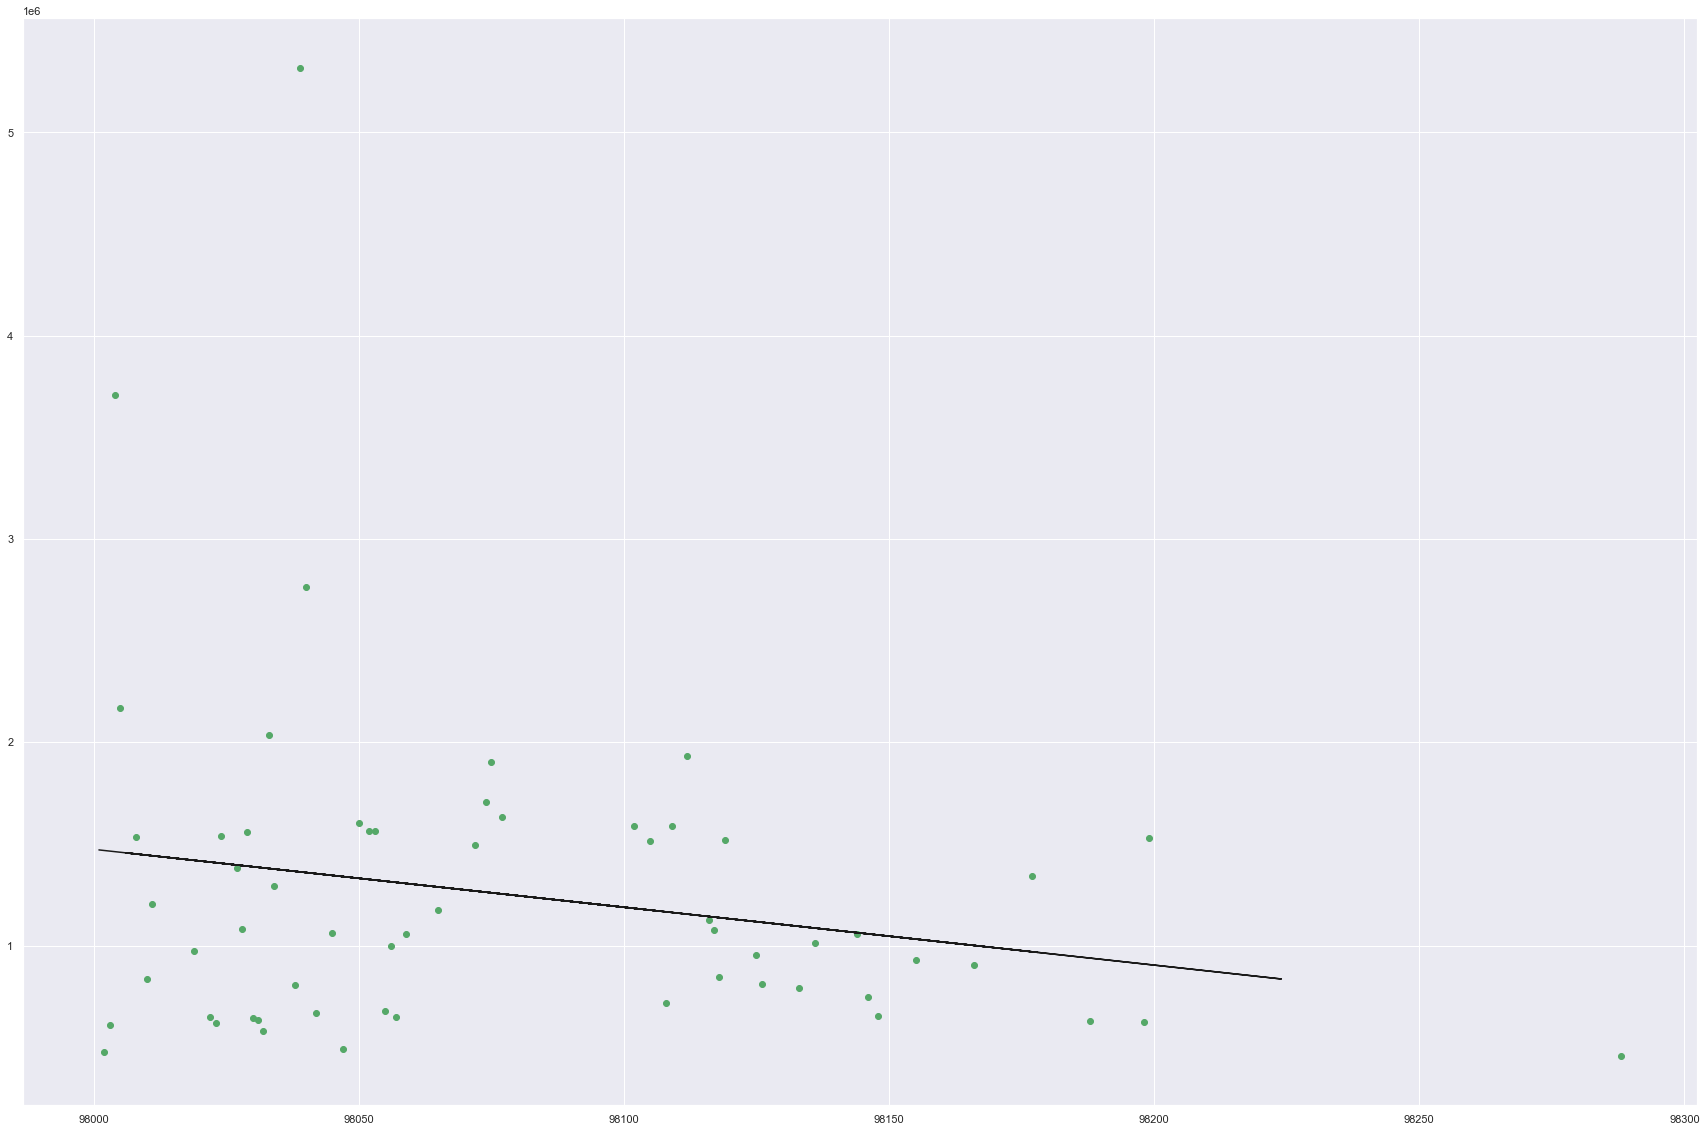

In [104]:
plt.scatter(X_train, y_train, color = 'g')
plt.plot(X_test, y_pred, color = 'k')
plt.show()

## Multiple Linear Regression - Model 1 Baseline

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [106]:
df = housing_df2.drop(columns=['zipcode'])

### Train-Test Split

In [107]:
y = df['price']

X = df.drop(columns=['price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


In [108]:
base  = ['bedrooms', 'bathrooms', 'sqft_living','sqft_above','floors',
         'sqft_garage','sqft_patio',"grade_code","view_code","condition_code"]

lr = LinearRegression()

results = lr.fit(X_train[base], y_train)

### Model 1

In [109]:
r_squared = lr.score(X_train[base], y_train)
r_squared

0.47047325138060514

In [110]:
adj_r2 = 1 - (1-r_squared) * ((len(y)-1)/(len(y)-X_train.shape[1]-1))
adj_r2

0.47005508433448506

In [111]:
lr.score(X_test[base], y_test)

0.4547422704890436

In [112]:
y_pred = lr.predict(X_test[base])

MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error =', MAE,'USD')

RMSE = mean_squared_error(y_test, y_pred, squared = False)
print('Root Mean Square Error =', RMSE,'USD')

Mean Absolute Error = 365919.0236586602 USD
Root Mean Square Error = 657370.0637888436 USD


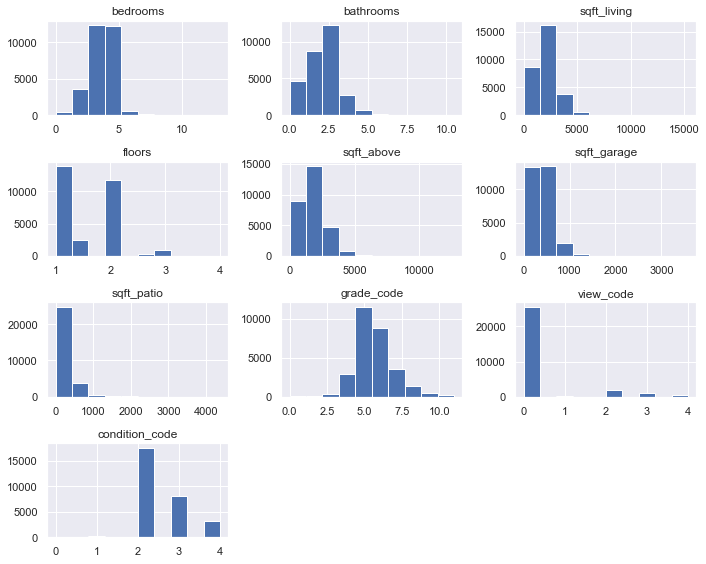

In [113]:
df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above','sqft_garage',
    'sqft_patio',"grade_code","view_code","condition_code"]].hist(figsize=(10,8))
plt.tight_layout();

In [100]:
import statsmodels.api as sm

X = grouped_zip[['zipcode']]
y = grouped_zip['price']

# Replace None with appropriate code
simple_model = sm.OLS(endog = y, exog = sm.add_constant(X))

simple_model_results = simple_model.fit()
print(simple_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     5.421
Date:                Wed, 31 May 2023   Prob (F-statistic):             0.0226
Time:                        12:00:34   Log-Likelihood:                -1131.4
No. Observations:                  76   AIC:                             2267.
Df Residuals:                      74   BIC:                             2271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.052e+08   1.31e+08      2.337      0.0